# Introdução

O comércio eletrônico está crescendo a uma taxa incrível, especialmente durante e continuando após a pandemia de COVID-19. Isso tem levado cada vez mais varejistas a abrir lojas online como uma extensão de seus negócios convencionais de tijolo e argamassa. Compreender quais fatores afetam as avaliações dos clientes, ou seja, a satisfação do cliente, é essencial para qualquer negócio, pois pode ajudar a melhorar as ofertas de produtos e serviços, bem como fortalecer a fidelidade do cliente. Além disso, como os compradores online são fortemente influenciados por avaliações (Bettina et al., 2018), avaliações negativas podem prejudicar a marca de uma empresa e sua receita futura. Se bem-sucedida, minha análise desses fatores preditivos me permitirá propor uma estratégia de negócios e marketing que poderia melhorar a receita e o crescimento. Embora isso seja em grande parte aplicável ao varejo online e ao comércio eletrônico em particular, pode fornecer insights mais amplos também. E para esta análise, usarei o Conjunto de Dados Públicos de Comércio Eletrônico Brasileiro da Olist.

Como uma adição, também analiso os dados do Fun que é da mesma empresa e faço algumas análises exploratórias de quais canais de marketing ajudam mais a OList.
Fontes:[Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce),
[Marketing Funnel by Olist | Kaggle](https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist?select=olist_closed_deals_dataset.csv). 


# O que será analisado e Resultado Esperado
O foco desta análise é pesquisar os principais fatores ou antecedentes da satisfação do cliente nas compras online, conforme expresso em avaliações e comentários. Escolhi o conjunto de dados publicamente disponível da Olist no Kaggle, que contém informações sobre mais de 100.000 pedidos online feitos de 2016 a 2018 em vários marketplaces brasileiros. Após um cliente fazer uma compra na Olist e o produto ser entregue ou a data estimada de entrega ter passado, o cliente recebe uma pesquisa de satisfação por e-mail para fornecer uma avaliação e um comentário.

Tem sido realizada uma pesquisa substancial sobre satisfação do cliente, fidelidade do cliente e comportamento do consumidor online em geral desde o advento do comércio eletrônico. As avaliações online são uma parte importante da comunicação de consumidor para consumidor sobre produtos e podem ser referidas como boca a boca eletrônico. 

Por que as avaliações são tão críticas para as compras online? Uma pesquisa recente descobriu que 30% dos compradores com menos de 45 anos consultam avaliações para cada compra, enquanto 86% consideram as avaliações essenciais para tomar decisões de compra. Na verdade, as avaliações são o fator com maior impacto nas compras, logo após o preço. 
Ao analisar um conjunto de dados de um ano inteiro para 2015 de um varejista online e usando um modelo de curva de aprendizado exponencial, [Askalidis & Malthouse](https://dl.acm.org/doi/abs/10.1145/2959100.2959181#sec-ref)  mostraram que, em média, a taxa de conversão de um produto pode aumentar em até 270% à medida que acumula avaliações. Isso fornece evidências fortes para o valor positivo das avaliações ou o efeito causal das avaliações na probabilidade de compra. É claro que as avaliações e as classificações não podem ser ignoradas pelos varejistas online ao tentarem aumentar as vendas e os lucros.

Como uma empresa pode garantir que seus clientes estejam satisfeitos com seus pedidos e motivados a deixar avaliações e comentários positivos? A satisfação pode ser definida de forma ampla como um fenômeno pós-compra que é uma resposta emocional à experiência com o produto comprado. Como tal, ela abrange o feedback do cliente usando avaliações e classificações online. Existem vários antecedentes para a satisfação do cliente online que foram identificados durante diferentes estágios da experiência de compra do cliente:

* (1) Busca por informações e avaliação de alternativas
* (2) Compra 
* (3) Pós-compra
O primeiro estágio inclui fatores como qualidade da informação, design do site e atributos da mercadoria. O segundo estágio inclui habilidade de transação, responsividade, segurança/privacidade e opções de pagamento. Finalmente, a satisfação no estágio pós-compra é mais afetada pela entrega e atendimento ao cliente.

Aqui, estou focando a atenção na satisfação pós-compra e observando quais foram os comentários negativos mais frequentes.
O objetivo é compreender melhor quais os pontos de atenção para minimizar os fatos que trazem como consequência feedbacks não positivos para que a empresa melhore sua fidelização e suas avaliações.


# Limpeza de Dados
## Visão geral sobre o conjunto de dados
O conjunto de dados da Olist disponível no Kaggle contém informações sobre mais de 100.000 pedidos online feitos de 2016 a 2018 em vários marketplaces brasileiros em diferentes arquivos. A Olist é uma empresa brasileira que agrega vendedores e seus produtos de vários marketplaces, permitindo que eles vendam seus produtos através da Olist Store e os enviem diretamente para os clientes usando os parceiros logísticos da Olist. Depois que um cliente faz uma compra na Olist, o vendedor recebe uma notificação para cumprir esse pedido. Assim que o produto é entregue, ou a data estimada de entrega passou, o cliente recebe uma pesquisa de satisfação por e-mail.

In [191]:
import pandas as pd
from patsy import dmatrices
from unidecode import unidecode
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import re
import nltk
nltk.download('rslp')
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from wordcloud import WordCloud

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\paula.muniz\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [2]:
# Load Olist Order and Sales datasets
geolocations =pd.read_csv("C:/Users/paula.muniz/pitch RH/dataset olist/olist_geolocation_dataset.csv")
customers = pd.read_csv("C:/Users/paula.muniz/pitch RH/dataset olist/olist_customers_dataset.csv")
items = pd.read_csv("C:/Users/paula.muniz/pitch RH/dataset olist/olist_order_items_dataset.csv")
reviews = pd.read_csv("C:/Users/paula.muniz/pitch RH/dataset olist/olist_order_reviews_dataset.csv")
products = pd.read_csv("C:/Users/paula.muniz/pitch RH/dataset olist/olist_products_dataset.csv")
sellers = pd.read_csv("C:/Users/paula.muniz/pitch RH/dataset olist/olist_sellers_dataset.csv")
payments = pd.read_csv("C:/Users/paula.muniz/pitch RH/dataset olist/olist_order_payments_dataset.csv")
orders = pd.read_csv("C:/Users/paula.muniz/pitch RH/dataset olist/olist_orders_dataset.csv")

Vou combinar os datasets criando um único chamado DATA.

In [3]:
# Realizando os merges
data = pd.merge(reviews, orders, on="order_id", how="left")
data = pd.merge(data, items, on="order_id", how="left")
data = pd.merge(data, payments, on="order_id", how="left")
data = pd.merge(data, products, on="product_id", how="left")
data = pd.merge(data, customers, on="customer_id", how="left")
data = pd.merge(data, sellers, on="seller_id", how="left")

# Removendo linhas duplicadas mantendo todas as colunas
data.drop_duplicates(subset="order_id", inplace=True)

# Obtendo as dimensões do dataframe resultante
print(data.shape)

(98673, 39)


In [4]:
data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,30.0,30.0,35.0,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP,14600.0,sao joaquim da barra,SP
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,19.0,14.0,14.0,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP,12233.0,sao jose dos campos,SP
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,20.0,20.0,20.0,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA,37175.0,ilicinea,MG
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,20.0,20.0,20.0,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC,37175.0,ilicinea,MG
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,...,105.0,35.0,50.0,d16000272660a1fef81482ad75ba572a,89520,curitibanos,SC,81730.0,curitiba,PR


Após os merges, tenho um conjunto de dados com 98.673 linhas e 39 colunas. São muitas variáveis! Meu primeiro passo será verificar os valores ausentes.

In [5]:
# Verificando os valores ausentes em cada coluna
na_counts = data.isna().sum()

# Exibindo o número de valores ausentes em cada coluna
print(na_counts)

review_id                            0
order_id                             0
review_score                         0
review_comment_title             87122
review_comment_message           57888
review_creation_date                 0
review_answer_timestamp              0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  155
order_delivered_carrier_date      1746
order_delivered_customer_date     2843
order_estimated_delivery_date        0
order_item_id                      756
product_id                         756
seller_id                          756
shipping_limit_date                756
price                              756
freight_value                      756
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
product_category_name             2161
product_name_lenght      

Há dados ausentes, o que é esperado em conjuntos de dados do mundo real. Vamos lidar com esses dados ausentes.
Como 80% dos pedidos não tiveram título de comentário de revisão deixado pelos clientes, e 60% não tiveram mensagem de comentário de revisão, não posso simplesmente remover todos os dados com valores vazios, pois perderia muitos dados. Em vez disso, adicionarei uma nova coluna "is_reviewed", cujo valor é 0 quando tanto o título do comentário quanto a mensagem estão em branco, e igual a 1 quando um ou ambos os valores não estão vazios.
Posteriormente irei substituir as notas vazias pela moda, e os textos por Não informado.

Além disso, estou adicionando as seguintes 3 variáveis, calculando o tempo de entrega, o tempo de envio e se a entrega foi feita no prazo.

* '***delivered_on_time***': se a entrega foi feita no prazo, com o valor '1' significando no prazo e '0' significando atraso
* '***shipped_on_time***': se o envio foi concluído no prazo, com o valor '1' significando no prazo e '0' significando atraso
* '***delivery_time***': tempo de envio - quantos dias levou entre o pedido e a entrega

In [6]:


# Convertendo colunas de data para o tipo datetime, se necessário
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Criar a coluna 'is_reviewed' usando numpy.where
data['is_reviewed'] = np.where((data['review_comment_title'] != '') | (data['review_comment_message'] != ''), 1, 0)

# Criar a coluna 'delivered_on_time' usando numpy.where
data['delivered_on_time'] = np.where((data['order_delivered_customer_date'] <= data['order_estimated_delivery_date']) & (~data['order_delivered_customer_date'].isna()), 1, 0)

# Criar a coluna 'shipped_on_time' usando numpy.where
data['shipped_on_time'] = np.where((data['order_delivered_carrier_date'] <= data['shipping_limit_date']) & (~data['order_delivered_carrier_date'].isna()), 1, 0)

# Calcular a coluna 'delivery_time'
data['delivery_time'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

# Exibir as primeiras linhas do DataFrame
print(data.head())

# Verificar valores NA em cada coluna
print(data.isna().sum())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
2  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
3  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
4  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
5  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   
5             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
2                                                NaN  2018-03-10 00:00:00   
3                                                NaN  2018-02-17 00:00:00   
4           

In [7]:
#substituindo os scores nulos pela moda
data['review_score'].fillna(5, inplace=True)

#Substituindo valores nulos de titulo e mensagem nos reviews
data['review_comment_title'].fillna('Sem Titulo',inplace =True)
data['review_comment_message'].fillna('Sem Mensagem',inplace =True)
#Os registros não foram excluídos pois contém notas que podem ser relevantes para a análise e classificação

#Substituindo valores nulos de data pela dta mais proxima
data['order_approved_at'].fillna(data['order_purchase_timestamp'], inplace=True)
data['order_delivered_carrier_date'].fillna(data['order_purchase_timestamp'], inplace=True)
data['order_delivered_customer_date'].fillna(data['order_purchase_timestamp'], inplace=True)
data['product_category_name'].fillna('Nao Informado', inplace=True)


In [8]:
#Removendo IDS desnecessários para esta análise
data.drop(['product_name_lenght'],axis=1,inplace=True)
data.drop(['product_description_lenght'],axis=1,inplace=True)
data.drop(['product_photos_qty'],axis=1,inplace=True)
data.drop(['product_weight_g'],axis=1,inplace=True)
data.drop(['product_length_cm'],axis=1,inplace=True)
data.drop(['product_height_cm'],axis=1,inplace=True)
data.drop(['product_width_cm'],axis=1,inplace=True)

In [9]:
order_statuses = data['order_status'].unique()

print(order_statuses)

['delivered' 'canceled' 'shipped' 'processing' 'unavailable' 'invoiced'
 'created' 'approved']


Agora vamos verificar novamente os valores nulos.

In [10]:
# Verificando os valores ausentes em cada coluna
na_counts = data.isna().sum()

# Exibindo o número de valores ausentes em cada coluna
print(na_counts)

review_id                           0
order_id                            0
review_score                        0
review_comment_title                0
review_comment_message              0
review_creation_date                0
review_answer_timestamp             0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                     756
product_id                        756
seller_id                         756
shipping_limit_date               756
price                             756
freight_value                     756
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
product_category_name               0
customer_unique_id                  0
customer_zip

In [11]:
dataset = data.dropna()
dataset.shape

(95829, 36)

In [12]:
98673-95829

2844

Isso significa que 2.844 linhas com valores NA foram removidas das 98.673 linhas totais, o que representa menos de 3% do conjunto de dados. Portanto, usarei o conjunto de dados limpo 'dataset' para a próxima Análise Exploratória de Dados (EDA).
Agora  vou explorar melhor o o conjunto de dados.

# 1. Análise exploratória Inicial - Entendendo os dados e as distribuições

A análise exploratória de dados (EDA) é uma abordagem crucial na fase inicial de qualquer projeto de análise de dados. Ela é realizada para investigar, entender e resumir as principais características, padrões e peculiaridades dos dados antes de aplicar técnicas mais avançadas de modelagem ou inferência estatística.

O objetivo principal da análise exploratória de dados é:

Entender os dados: Isso inclui examinar a estrutura dos dados, identificar variáveis importantes, entender suas distribuições e verificar a presença de valores ausentes ou inconsistências.

Identificar padrões e tendências: Através de visualizações e estatísticas descritivas, é possível identificar padrões, tendências e correlações nos dados, o que pode fornecer insights valiosos sobre o problema em questão.

Detectar anomalias e outliers: A EDA ajuda a identificar valores atípicos ou discrepantes nos dados que podem ser erros de medição, registros corrompidos ou casos especiais que merecem atenção especial.

Validar suposições: A análise exploratória permite testar hipóteses preliminares e validar suposições sobre os dados e o problema em questão.

Preparar os dados para modelagem: Durante a análise exploratória, podem ser feitas transformações nos dados, como tratamento de valores ausentes, normalização de variáveis e seleção de características, para preparar os dados para modelagem estatística ou de aprendizado de máquina. de máquina.

## 1.1. Análise do status do pedido
#### Compreender os diferentes status dos pedidos pode fornecer insights sobre a eficiência do processo de pedidos e entrega. Vamos visualizar a distribuição dos status dos pedidos.


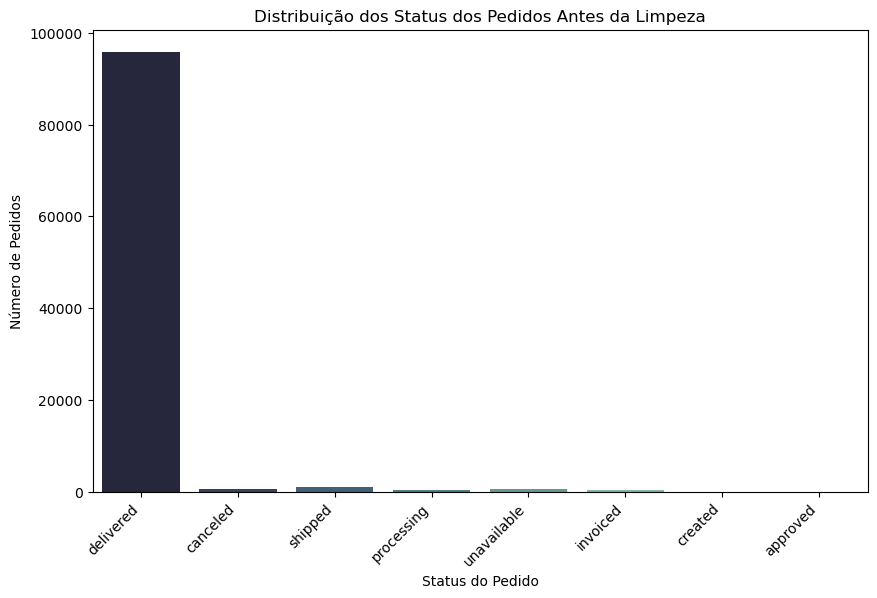

In [13]:
plt.figure(figsize=(10, 6))
palette = sns.cubehelix_palette(start=.2, rot=-.5, n_colors=8,reverse=True)
sns.countplot(data=data, x='order_status', palette=palette)
plt.title('Distribuição dos Status dos Pedidos Antes da Limpeza')
plt.xlabel('Status do Pedido')
plt.ylabel('Número de Pedidos')

plt.xticks(rotation=45, ha='right')
plt.show()

Podemos ver que em nosso dataset original, a maioria dos pedidos está no status "delivered" (entregue), o que é positivo. Entretanto, também há um número significativo de pedidos em outros estados, incluindo "shipped" (enviado), "processing" (processando) e "unavailable" (indisponível), o que pode indicar problemas no processo de pedidos.
Porém, como pode ser observado abaixo,após realizarmos as limpezas na etapa anterior, restaram apenas pedidos entregues e poucos registros cancelados


In [14]:
plt.figure(figsize=(10, 6))
palette = sns.cubehelix_palette(start=.2, rot=-.5, n_colors=8,reverse=True)

plt.show()

<Figure size 1000x600 with 0 Axes>

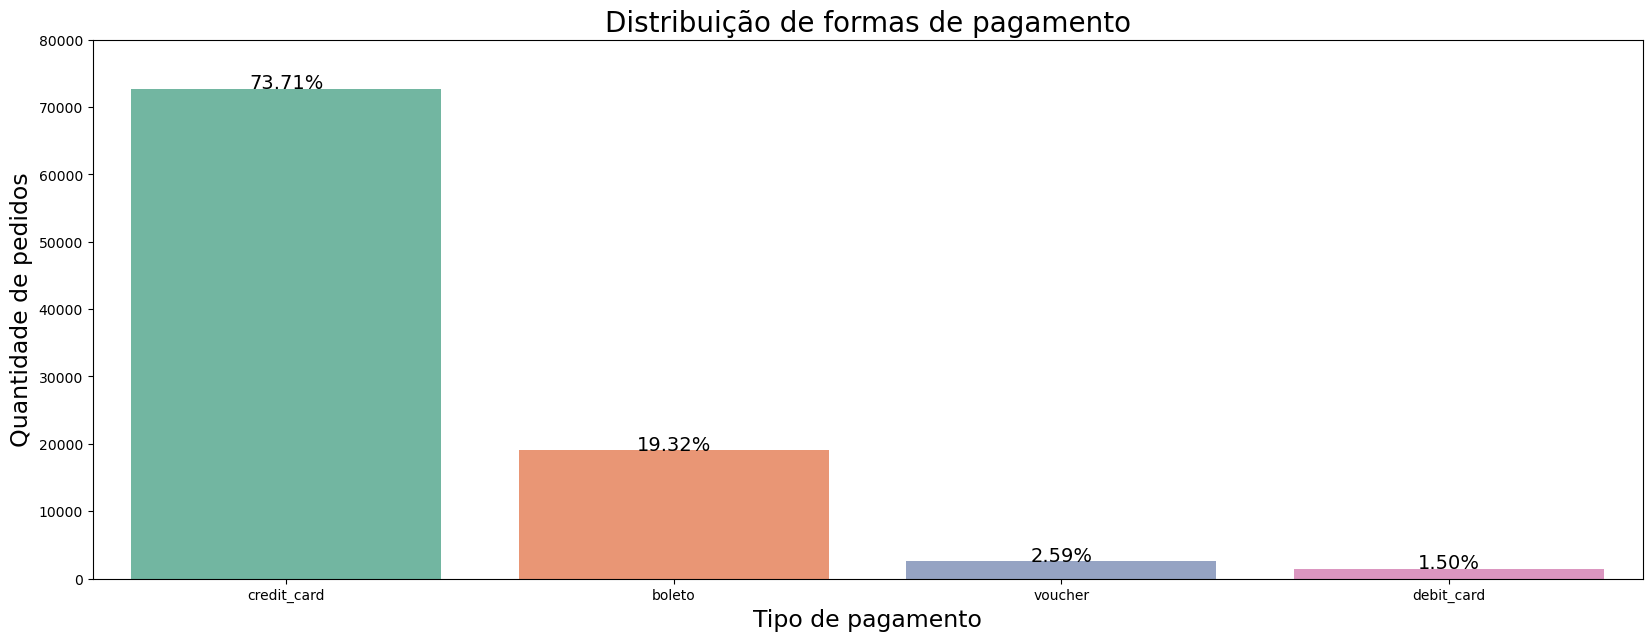

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 7))

# Calcula a contagem de cada tipo de pagamento
payment_counts = dataset['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

total = len(data)

# Cria o gráfico de barras
g = sns.barplot(x='payment_type', y='count', data=payment_counts, palette='Set2')
g.set_title("Distribuição de formas de pagamento", fontsize=20)
g.set_xlabel("Tipo de pagamento", fontsize=17)
g.set_ylabel("Quantidade de pedidos", fontsize=17)

# Adiciona porcentagens no topo das barras
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x() + p.get_width() / 2.,
           height + 3,
           '{:1.2f}%'.format(height / total * 100),
           ha="center", fontsize=14)

# Define o limite do eixo y
g.set_ylim(0, max(sizes) * 1.1)

plt.show()


Como podemos ver no gráfico, a maioria dos pagamentos é feita via cartão de crédito

## 1.2. Análise temporal
#### Padrões de compra ao longo do tempo


In [16]:
#Criando colunas separando as datas para análise
dataset['ano_compra'] = dataset['order_purchase_timestamp'].dt.year
dataset['mes_compra'] = dataset['order_purchase_timestamp'].dt.month
dataset['dia_compra'] = dataset['order_purchase_timestamp'].dt.day
dataset['dia_semana_compra'] = dataset['order_purchase_timestamp'].dt.weekday

C:\Users\paula.muniz\AppData\Local\Temp\ipykernel_21552\3915740133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ano_compra'] = dataset['order_purchase_timestamp'].dt.year
C:\Users\paula.muniz\AppData\Local\Temp\ipykernel_21552\3915740133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['mes_compra'] = dataset['order_purchase_timestamp'].dt.month
C:\Users\paula.muniz\AppData\Local\Temp\ipykernel_21552\3915740133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [17]:
#Criando campos de dia da semana
name_dia = []
for d in dataset.dia_semana_compra:
  if d == 6:
    d = 'dom'
  elif d == 0:
    d = 'seg'
  elif d == 1:
    d = 'ter'
  elif d == 2:
    d = 'qua'
  elif d == 3:
    d = 'qui'
  elif d == 4:
    d = 'sex'
  else:
    d = 'sab'
  name_dia.append(d)
dataset['dia_semana_compra'] = name_dia
dataset.head()

C:\Users\paula.muniz\AppData\Local\Temp\ipykernel_21552\3695615399.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['dia_semana_compra'] = name_dia


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,seller_city,seller_state,is_reviewed,delivered_on_time,shipped_on_time,delivery_time,ano_compra,mes_compra,dia_compra,dia_semana_compra
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Sem Titulo,Sem Mensagem,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,sao joaquim da barra,SP,1,1,1,6.0,2018,1,11,qui
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Sem Titulo,Sem Mensagem,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,sao jose dos campos,SP,1,1,1,9.0,2018,2,28,qua
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Sem Titulo,Sem Mensagem,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,ilicinea,MG,1,1,1,13.0,2018,2,3,sab
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Sem Titulo,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,ilicinea,MG,1,1,1,10.0,2017,4,9,dom
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Sem Titulo,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,...,curitiba,PR,1,1,0,18.0,2018,2,10,sab


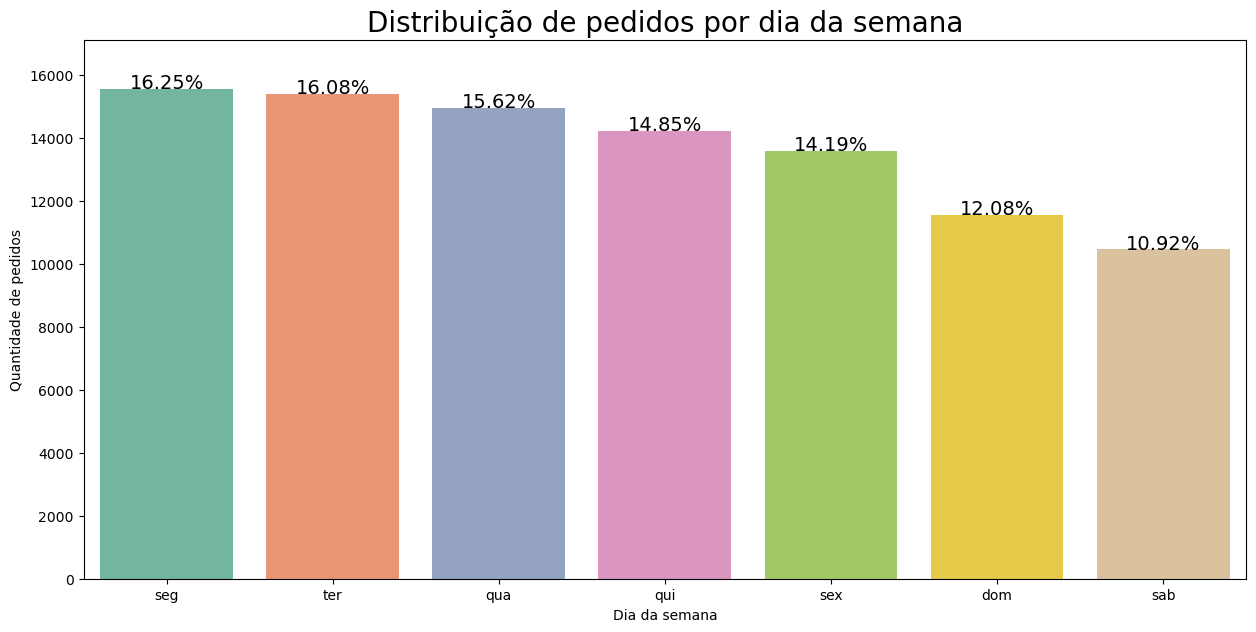

In [18]:
plt.figure(figsize=(15, 7))

# Calcula a contagem de pedidos por dia da semana
sazonalidade_semana = dataset['dia_semana_compra'].value_counts().reset_index()
sazonalidade_semana.columns = ['dia_semana_compra', 'quantidade_pedidos']

# Cria o gráfico de barras
g = sns.barplot(x='dia_semana_compra', y='quantidade_pedidos', data=sazonalidade_semana, palette='Set2')
plt.title("Distribuição de pedidos por dia da semana", fontsize=20)
plt.xlabel('Dia da semana')
plt.ylabel('Quantidade de pedidos')

# Adiciona porcentagens no topo das barras
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    plt.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.2f}%'.format(height / sazonalidade_semana['quantidade_pedidos'].sum() * 100),
             ha="center", fontsize=14)

# Define o limite do eixo y
plt.ylim(0, max(sizes) * 1.1)

plt.show()


## 2.3. Satisfação do cliente
#### 2.3.1. Distribuição das classificações de revisão

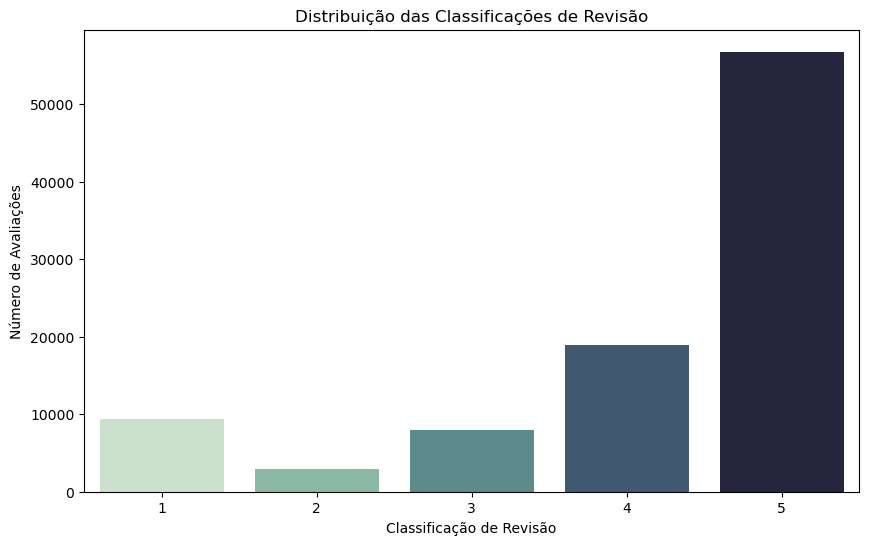

In [199]:
plt.figure(figsize=(10, 6))

palette = sns.cubehelix_palette(start=.2, rot=-.5, n_colors=5)
sns.countplot(data=dataset, x='review_score', palette=palette)
plt.title('Distribuição das Classificações de Revisão')
plt.xlabel('Classificação de Revisão')
plt.ylabel('Número de Avaliações')
plt.savefig('Dist_Classificações.png', format='png')
plt.show()

### Existe relação com o valor pago e as avaliações?

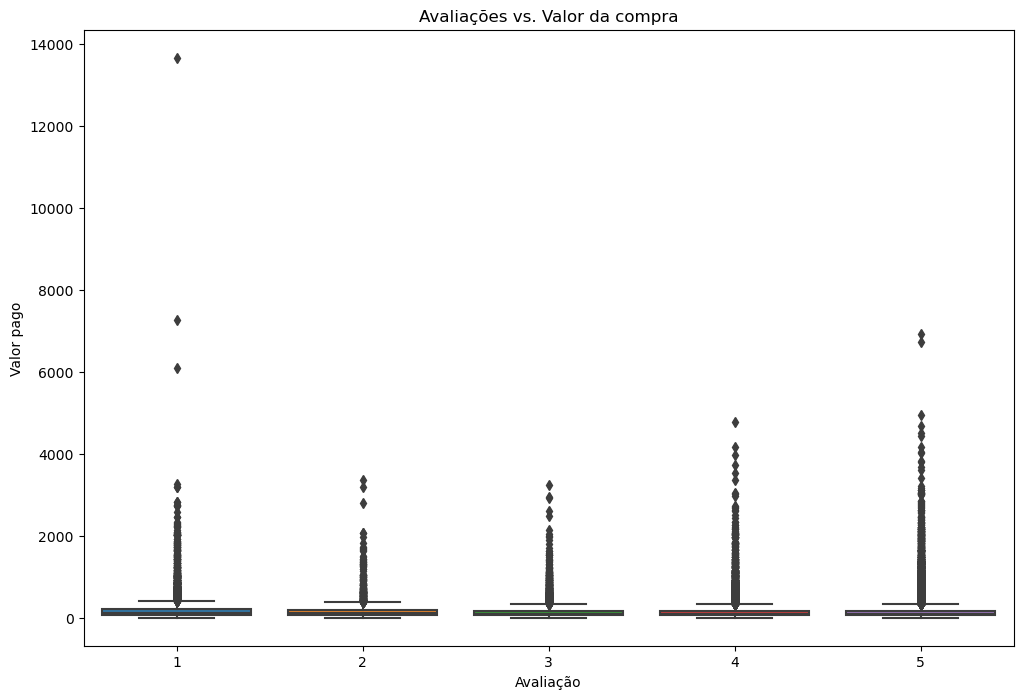

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='review_score', y='payment_value', data=dataset)
plt.title('Avaliações vs. Valor da compra')
plt.xlabel('Avaliação')
plt.ylabel('Valor pago')
plt.show()


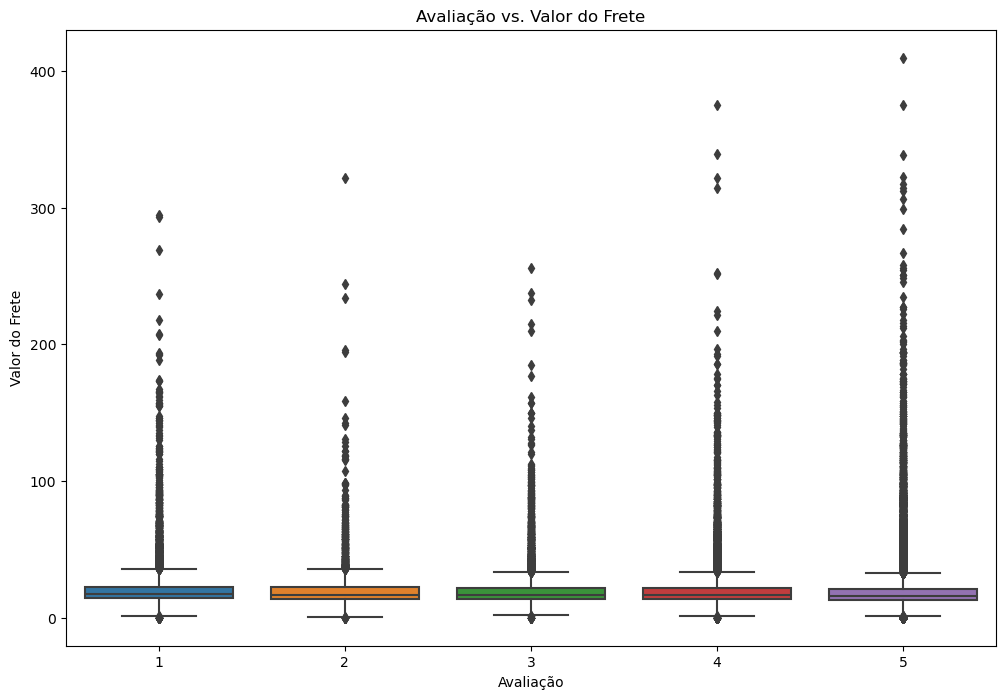

In [21]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='review_score', y='freight_value', data=dataset)
plt.title('Avaliação vs. Valor do Frete')
plt.xlabel('Avaliação')
plt.ylabel('Valor do Frete')
plt.show()

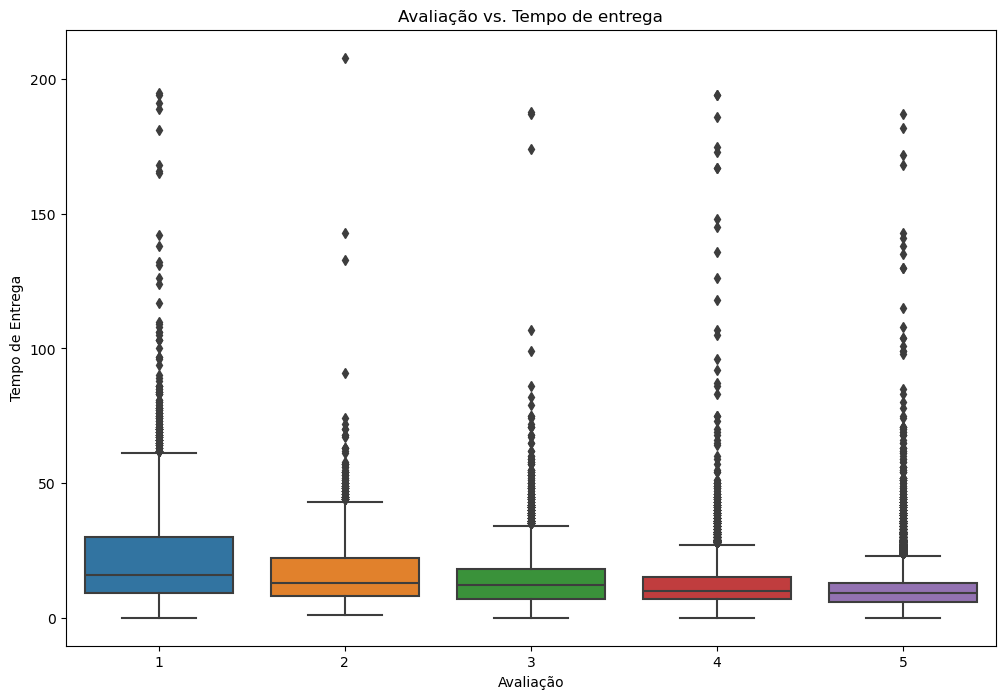

In [200]:
# Predictor 'delivery_time': Does shorter delivery time have better review?
plt.figure(figsize=(12, 8))
sns.boxplot(x='review_score', y='delivery_time', data=dataset)
plt.title('Avaliação vs. Tempo de entrega')
plt.xlabel('Avaliação')
plt.ylabel('Tempo de Entrega')
plt.savefig('Av_VS_entrega.png', format='png')
plt.show()

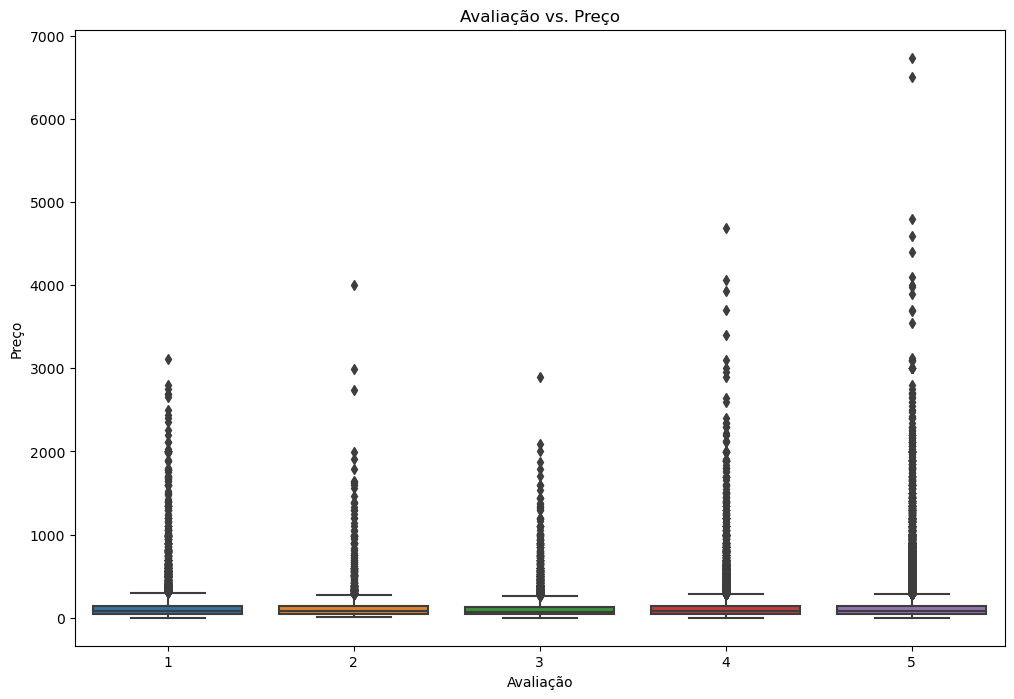

In [23]:
# Predictor 'price': Does higher price have better review?
plt.figure(figsize=(12, 8))
sns.boxplot(x='review_score', y='price', data=dataset)
plt.title('Avaliação vs. Preço')
plt.xlabel('Avaliação')
plt.ylabel('Preço')
plt.show()

Vou responder às seguintes perguntas:

**'payment_value'**: Pagamentos mais altos estão relacionados a avaliações melhores?
**'freight_value'**: Pedidos com fretes mais altos geralmente têm avaliações melhores?
**'delivery_period'**: Tempos de entrega mais curtos estão relacionados a avaliações melhores?
**'price'**: Pedidos com preços mais altos geralmente têm avaliações melhores?
Enquanto os gráficos A, B e D não mostraram uma tendência clara, o gráfico C mostrou que tempos de entrega mais curtos tendem a ter avaliações melhores.

# 3. Selecionando os preditores para análise
Estou usando a regressão Stepwise para simplificar meu modelo, removendo os preditores que forem insignificantes.
A regressão stepwise é um método para selecionar os preditores mais relevantes em uma análise de regressão. Ele adiciona ou remove preditores com base em sua significância estatística, simplificando o modelo ao incluir apenas as variáveis mais importantes.

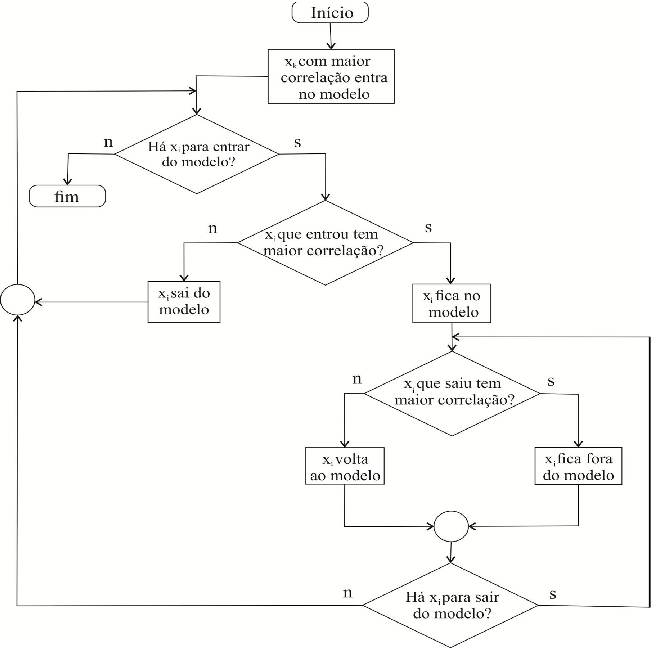


In [24]:
# Intercept-only model
model_0 = sm.OLS(dataset['review_score'], sm.add_constant(np.ones(len(dataset)))).fit()
print(model_0.summary())

# All-predictor model
# Convertendo todas as colunas para um tipo numérico compatível

# Codificando variáveis categóricas usando get_dummies
X = pd.get_dummies(dataset[['order_status', 'payment_type']], drop_first=True)  # drop_first=True para evitar a multicolinearidade
X[['shipped_on_time', 'delivered_on_time', 'delivery_time', 'payment_sequential', 'payment_installments', 'payment_value', 'price', 'freight_value', 'is_reviewed']] = dataset[['shipped_on_time', 'delivered_on_time', 'delivery_time', 'payment_sequential', 'payment_installments', 'payment_value', 'price', 'freight_value', 'is_reviewed']]
y = dataset['review_score']

X = sm.add_constant(X)
model_all = sm.OLS(y, X.astype(float)).fit()
print(model_all.summary())

# Convert pandas DataFrame
y, X = dmatrices('review_score ~ order_status + shipped_on_time + delivered_on_time + delivery_time + payment_sequential + payment_type + payment_installments + payment_value + price + freight_value + is_reviewed', dataset, return_type='dataframe')

# Stepwise regression
stepwise_model = sm.OLS(y, X).fit()
print(stepwise_model.summary())


                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 20 May 2024   Prob (F-statistic):                nan
Time:                        08:11:06   Log-Likelihood:            -1.5998e+05
No. Observations:               95829   AIC:                         3.200e+05
Df Residuals:                   95828   BIC:                         3.200e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1562      0.004   1001.548      0.0

## Intercept-only model:

Neste modelo, há apenas uma constante (const), que representa o intercepto do modelo de regressão linear.
Os coeficientes representam a média da variável dependente (review_score) quando todos os preditores são zero. Aqui, o valor do intercepto (const) é 4.1562, com um desvio padrão de 0.004.
O p-valor associado ao intercepto é próximo de zero (0.000), o que significa que o intercepto é estatisticamente significativo.
O R² é zero, indicando que o modelo não explica nenhuma variação na variável dependente. Isso é esperado, pois há apenas o intercepto no modelo.

## All-predictor model:

Neste modelo, vários preditores foram incluídos.
Cada coeficiente representa a mudança média na variável dependente (review_score) para um aumento unitário na variável preditora correspondente, mantendo todas as outras variáveis constantes.
Por exemplo, o coeficiente associado a delivery_time é -0.0248, o que indica que, mantendo todas as outras variáveis constantes, para cada dia adicional de tempo de entrega, espera-se uma redução média de 0.0248 na pontuação da revisão.
O R² é 0.164, o que significa que aproximadamente 16.4% da variabilidade na variável dependente é explicada pelos preditores incluídos no modelo.

## Stepwise regression:

Este modelo é semelhante ao modelo "All-predictor", mas é obtido através de uma abordagem de regressão stepwise.
Os coeficientes e interpretações são semelhantes ao modelo "All-predictor", representando a mudança média na variável dependente para um aumento unitário na variável preditora correspondente, mantendo todas as outras variáveis constantes.
O R² também é semelhante, indicando a proporção da variabilidade na variável dependente explicada pelos preditores no modelo.

Eu usei a regressão Stepwise para remover preditores insignificantes e simplificar os modelo.
No fim, utilizarei:

### Preditores:

- order_status_delivered
- payment_type_credit_card
- payment_type_debit_card
- payment_type_voucher
- shipped_on_time
- delivered_on_time
- delivery_time
- payment_sequential
- payment_installments
- payment_value
- price
- freight_value
- is_reviewed

# 4. Modelagem: Regressão Linear
#### Por que usar Regressão Linear?

Partindo das nossas análises exploratórias, foi possível verificar que existia uma relação linear entre as variáveis independentes (ex: delivery_time, freight_value) e a variável dependente (review_score). Por exemplo, um tempo de entrega menor (delivery_time) deve aumentar a review_score.
Portanto, este modelo foi escolhido pelos seguintes motivos:
- Interpretação Simples: A regressão linear vai fornecer coeficientes que mostram claramente como cada variável influencia a review_score. Isso é valioso para entender quais fatores são mais importantes para melhorar as avaliações dos clientes.
- Rápido e Eficiente: O modelo de regressão linear é rápido de treinar e computacionalmente eficiente, ideal para uma análise inicial.

In [25]:
# Copiar o conjunto de dados original
data = dataset.copy()


In [26]:
# Selecionar apenas as colunas desejadas
dataset = data[['order_status',
                'payment_type',
                'shipped_on_time',
                'delivered_on_time',
                'delivery_time',
                'payment_sequential',
                'payment_installments',
                'payment_value',
                'price',
                'freight_value',
                'is_reviewed',
                'review_score']] 

# Converter variáveis booleanas em variáveis dummy com valores 0 e 1
dataset = pd.get_dummies(dataset, columns=['order_status', 'payment_type'], dtype=int)


# Adicionar a variável binária 'satisfied'
dataset['satisfied'] = np.where(dataset['review_score'] >= 4, 1, 0)

# Exibir as primeiras linhas do conjunto de dados
dataset.head()


,shipped_on_time,delivered_on_time,delivery_time,payment_sequential,payment_installments,payment_value,price,freight_value,is_reviewed,review_score,order_status_canceled,order_status_delivered,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,satisfied
0,1,1,6.0,1.0,8.0,397.26,185.00,13.63,1,4,0,1,0,1,0,0,1
2,1,1,9.0,1.0,1.0,88.09,79.79,8.30,1,5,0,1,0,1,0,0,1
3,1,1,13.0,1.0,1.0,194.12,149.00,45.12,1,5,0,1,0,1,0,0,1
4,1,1,10.0,1.0,1.0,222.84,179.99,42.85,1,5,0,1,0,1,0,0,1
5,0,1,18.0,1.0,10.0,1333.25,1199.00,134.25,1,5,0,1,0,1,0,0,1


In [27]:
# Dividir o conjunto de dados
x = dataset.drop(columns=['review_score', 'satisfied'])
y = dataset['satisfied']

# Dividir em treino, validação e teste
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=0.1765, random_state=42)

# Verificar as formas dos conjuntos de dados
print("Tamanho do conjunto de treinamento:", x_train.shape)
print("Tamanho do conjunto de validação:", x_valid.shape)
print("Tamanho do conjunto de teste:", x_test.shape)


Tamanho do conjunto de treinamento: (67077, 15)
Tamanho do conjunto de validação: (14377, 15)
Tamanho do conjunto de teste: (14375, 15)


In [28]:
print(x_train.head(5))

       shipped_on_time  delivered_on_time  delivery_time  payment_sequential  \
43400                1                  1           15.0                 1.0   
40637                1                  1            7.0                 1.0   
71943                1                  1            8.0                 1.0   
42360                1                  1           13.0                 1.0   
79252                1                  1            5.0                 1.0   

       payment_installments  payment_value   price  freight_value  \
43400                   2.0         201.23  169.00          32.23   
40637                   3.0         173.32   67.00          19.66   
71943                   1.0          80.81   59.90          20.91   
42360                   1.0          72.05   49.99          22.06   
79252                   4.0          87.71   79.90           7.81   

       is_reviewed  order_status_canceled  order_status_delivered  \
43400            1                 

## 4.1. Linear Regression
### With all predictors

In [29]:
##3.1. Linear regression
lr_model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              satisfied   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     826.4
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        08:11:08   Log-Likelihood:                -30301.
No. Observations:               67077   AIC:                         6.063e+04
Df Residuals:                   67064   BIC:                         6.075e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
shipped_on_time         

In [30]:
# Predição usando o modelo de regressão logística
lr_model = lr_model.predict(x_valid)
lr_model = (lr_model > 0.5).astype(int)

# Criar uma tabela de comparação
comp_table = pd.DataFrame({'lr_model': lr_model, 'satisfied': y_valid})

# Calcular a acurácia
log_acc = (comp_table['lr_model'] == comp_table['satisfied']).mean()
print('Accuracy of prediction with all predictors is: {:.2f}%'.format(log_acc * 100))

Accuracy of prediction with all predictors is: 81.70%


A partir do modelo final de regressão linear, vamos prestar atenção principalmente nos 4 preditores:

* 'shipped_on_time': Possui o coeficiente mais alto, afetando significativamente a pontuação da revisão positivamente.
  
* 'delivery_time': Como explorado na EDA, quanto mais tempo leva para a entrega, menor é a pontuação da revisão.
  
* 'freight_value': Os clientes podem não se importar com altas taxas de envio. Parece que eles podem pagar taxas mais altas, desde que estejam satisfeitos com a entrega.
  
* 'is_reviewed': Os clientes que deixaram avaliações geralmente estão insatisfeitos com seus pedidos, o que significa que a seção de comentários pode parecer mais negativa em comparação com a pontuação real da revisão.

A partir da Análise Exploratória de Dados, obtivemos resultados consistentes de que a satisfação dos clientes ('review_score') é significativamente afetada por:

- Os pedidos são entregues dentro do prazo (positivamente),

- Quanto tempo leva desde o recebimento do pedido até a entrega (negativamente).

Já analisando através do modelo de Regressão linear, descobrimos que os atributos que tiveram o maior efeito na satisfação positiva do cliente foram:

- Se o produto chegou ao cliente no prazo.
- O custo do produto.

## 5. NLP 
Processamento de Linguagem Natural é um ramo da Inteligência Artificial o qual consiste em utilizar técnicas que possibilitem a interação entre computadores e seres humanos usando a linguagem natural, com o objetivo final de ler, decifrar, entender e entender as linguagens humanas de uma maneira valiosa.

In [31]:
# Selecionar colunas relevantes e excluir linhas com valores nulos na coluna 'review_comment_message'
df_comments = data.loc[:, ['review_score', 'review_comment_message']]
df_comments = df_comments.dropna(subset=['review_comment_message'])

# Excluir linhas onde 'review_comment_message' é igual a 'Sem Mensagem'
df_comments = df_comments[df_comments['review_comment_message'] != 'Sem Mensagem']

# Resetar o índice
df_comments = df_comments.reset_index(drop=True)

# Renomear colunas
df_comments.columns = ['score', 'comment']

# Exibir a forma do dataset e as primeiras linhas
print(f'Dataset shape: {df_comments.shape}')
df_comments.head()

Dataset shape: (38914, 2)


,score,comment
0,5,Recebi bem antes do prazo estipulado.
1,5,Parabéns lojas lannister adorei comprar pela I...
2,4,aparelho eficiente. no site a marca do aparelh...
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,"Vendedor confiável, produto ok e entrega antes..."


In [32]:
df_comments['word_count'] = df_comments.comment.apply(lambda x: len(str(x).split()))

In [33]:
df_comments.word_count.max()

45

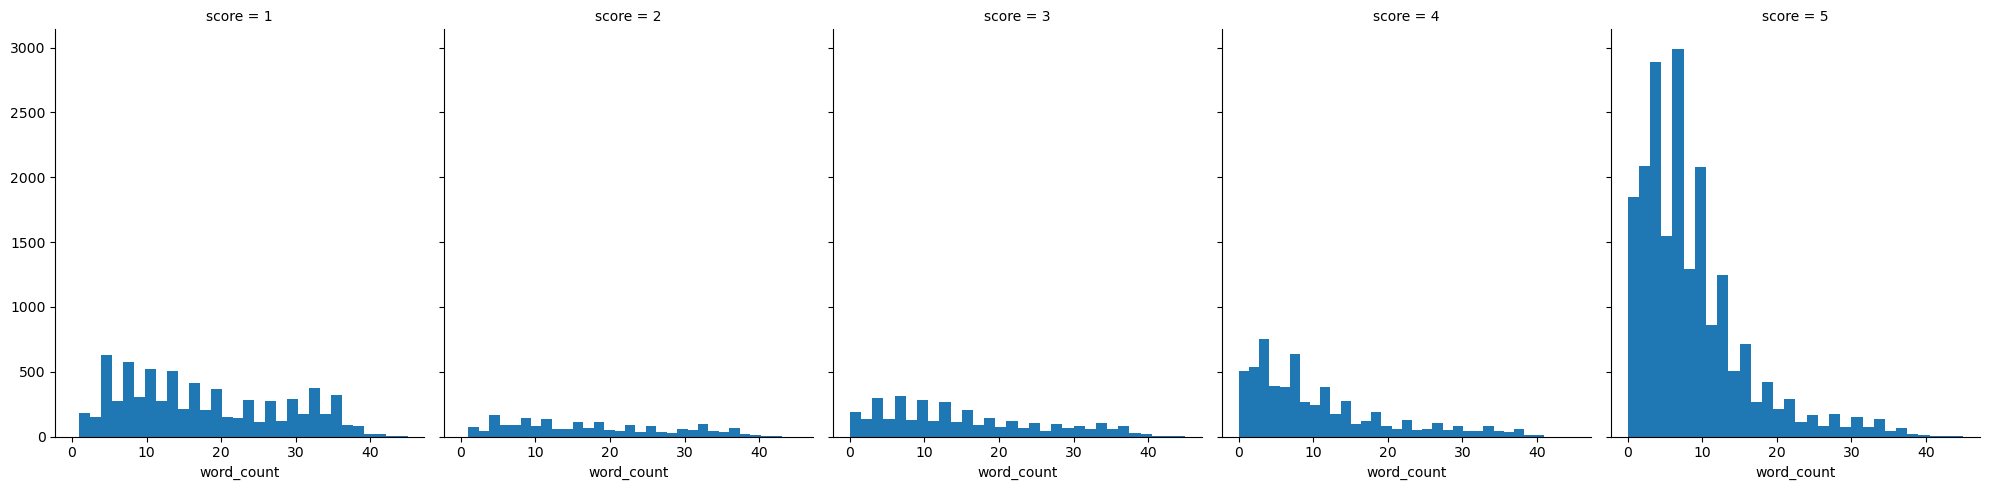

In [34]:
g = sns.FacetGrid(data=df_comments, col='score',height=5, aspect=0.8)
before_remove = g.map(plt.hist, 'word_count', bins=30)
before_remove

Então, temos em mãos aproximadamente 38 mil comentários que podem ser usados para treinar um modelo de análise de sentimentos. Mas, para que isso se torne realidade, precisamos percorrer um longo caminho de preparação de texto para transformar a entrada dos comentários em um vetor que possa ser interpretado por um modelo de Machine Learning.




## 5.1 Expressões Regulares
Desde que a internet se tornou uma importante fonte de dados, provavelmente teremos que lidar com algumas tags HTML, quebras de linha, caracteres especiais e outros conteúdos que podem fazer parte do dataset. Vamos explorar um pouco mais as Expressões Regulares para procurar por esses padrões.

Primeiramente, vamos definir uma função que será usada para analisar os resultados de uma expressão regular aplicada. Com isso, podemos validar nosso pré-processamento de texto de uma maneira mais fácil.

In [35]:
def find_patterns(re_pattern, text_list):
    """
    Args:
    ---------
    re_pattern: padrão de expressão regular a ser usado na busca [tipo: string]
    text_list: lista com strings de texto [tipo: list]
    
    Returns:
    positions_dict: dicionário Python com pares chave-valor conforme abaixo:
        text_idx: [(início_padrão1, fim_padrão1), (início_padrão2, fim_padrão2), ... (início_n, fim_n)]
    """
    
    # Compilando a Expressão Regular passada como argumento
    p = re.compile(re_pattern)
    positions_dict = {}
    i = 0
    for c in text_list:
        match_list = []
        iterator = p.finditer(c)
        for match in iterator:
            match_list.append(match.span())
        control_key = f'Índice do texto {i}'
        if len(match_list) == 0:
            pass
        else:
            positions_dict[control_key] = match_list
        i += 1
        
    """p = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    pattern_dict = find_patterns(p, reviews_breakline)
    print(len(pattern_dict))
    pattern_dict
    for idx in [int(c.split(' ')[-1]) for c in list(pattern_dict.keys())]:
        print(f'{reviews_breakline[idx]}\n')"""

    return positions_dict

def print_step_result(text_list_before, text_list_after, idx_list):
    """
    Args:
    ----------
    text_list_before: objeto lista com conteúdo de texto antes da transformação [tipo: list]
    text_list_after: objeto lista com conteúdo de texto após a transformação [tipo: list]
    idx_list: objeto lista com índices a serem impressos [tipo: list]
    """
    
    # Iterando sobre exemplos de strings
    i = 1
    for idx in idx_list:
        print(f'--- Texto {i} ---\n')
        print(f'Antes: \n{text_list_before[idx]}\n')
        print(f'Depois: \n{text_list_after[idx]}\n')
        i += 1


### 5.1.1 Quebra de Linha 

Para comentários que houverem quebras de linha, irei substituir por espaço.

In [36]:
def re_breakline(text_list):
    """
    Aplica uma expressão regular para substituir quebras de linha por espaços.

    Args:
    ----------
    text_list: objeto lista com conteúdo de texto a ser preparado [tipo: list]
    
    Returns:
    ----------
    Uma lista de strings onde quebras de linha foram substituídas por espaços.
    """
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

In [54]:
#Criando uma lista de comentários
comentarios = list(df_comments['comment'].values)

#Aplicando RegEx
reviews_breakline = re_breakline(comentarios)
df_comments['re_breakline'] = reviews_breakline

#Verificando os resultados
print_step_result(comentarios, reviews_breakline, idx_list=[45])

--- Texto 1 ---

Antes: 
Estava faltando apenas um produto, eu recebi hoje , muito obrigada!
Tudo certo!

Att 

Elenice.

Depois: 
Estava faltando apenas um produto, eu recebi hoje , muito obrigada!  Tudo certo!    Att     Elenice.



### 5.1.2 Hiperlinks e Sites
Outro padrão que deve ser tratado são os sites e hiperlinks. Vou definir outra função para aplicar expressões regulares nas ocorrências.

In [39]:
def re_hiperlinks(text_list):
    """
    Args:
    ----------
    text_list: lista de objetos de texto a serem preparados [tipo: lista]
    """
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]


In [53]:
reviews_hiperlinks = re_hiperlinks(reviews_breakline)
df_comments['re_hiperlinks'] = reviews_hiperlinks

### 5.1.3 Datas

Como estamos lidando com avaliações de clientes sobre itens comprados online, é provável que menções de datas aconteçam. Para isso, irei aplicar uma expressão regular (RegEx) para mudar estas ocorrências para "data".

In [41]:
def re_dates(text_list):
    """
    Args:
    ----------
    text_list: lista de objetos com o conteúdo de texto a ser preparado [tipo: lista]
    """
    padrão = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(padrão, ' data ', r) for r in text_list]

In [52]:
reviews_dates = re_dates(reviews_hiperlinks)
df_comments['re_dates'] = reviews_dates

### 5.1.4 Moeda

Outro padrão que provavelmente é muito comum nesse tipo de fonte são as representações de dinheiro (R$ ,). Para melhorar nosso modelo, irei transformar esse padrão na palavra-chave "valor".

In [49]:
def re_money(text_list):
    """
    Args:
    ----------
    text_list: lista de objetos com o conteúdo de texto a ser preparado [tipo: lista]
    """
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', r) for r in text_list]

In [64]:
reviews_money = re_money(reviews_dates)
df_comments['re_money'] = reviews_money

### 5.1.5 Números

Nesta expressão regular, todos os números que aparecerem nas avaliações serão substituídas por outra string "numero". Outra abordagem seria substituir os números por espaços em branco, mas isso provavelmente geraria perda de informação, o que não seria interessante para nossa análise.

In [56]:
def re_numbers(text_list):
    """
    Args:
    ----------
    text_series: lista de objetos com o conteúdo de texto a ser preparado [tipo: lista]
    """
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]

In [58]:
reviews_numbers = re_numbers(reviews_money)
df_comments['re_numbers'] = reviews_numbers
print_step_result(reviews_money, reviews_numbers, idx_list=[65])

--- Texto 1 ---

Antes: 
Comprei o produto dia 25 de fevereiro e hoje dia 29 de marco não fora entregue na minha residência. Não sei se os correios desse Brasil e péssimo ou foi a própria loja que demorou postar.

Depois: 
Comprei o produto dia  numero  de fevereiro e hoje dia  numero  de marco não fora entregue na minha residência. Não sei se os correios desse Brasil e péssimo ou foi a própria loja que demorou postar.



### 5.1.6 Negação

Quando removermos as stopwords, provavelmente o significado de algumas frases seria alterado (ao remover palavras de negação, como "não" (not), por exemplo). Portanto, irei substituir elas pela palavra negação para manter o sentido.

In [74]:
def re_negation(text_list):
    """
    Args:
    ----------
    text_series: lista de objetos com o conteúdo de texto a ser preparado [tipo: lista]
    """
    return [re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN]  )', ' negação ', r) for r in text_list]

In [76]:
# Applying RegEx
reviews_negation = re_negation(reviews_numbers)
df_comments['re_negation'] = reviews_negation

# Verifying results
print_step_result(reviews_numbers, reviews_negation, idx_list=[4783, 4627, 4853, 4904])

--- Texto 1 ---

Antes: 
Bom dia, meu nome é Ana Paula Amancio, e ainda não recebi meu produto,. Peço que me dê uma posição , pois já faz muito tempo que comprei. Sei que devido a greve dos caminhoneiros tudo estava parado.

Depois: 
Bom dia, meu nome é Ana Paula Amancio, e ainda  negação  recebi meu produto,. Peço que me dê uma posição , pois já faz muito tempo que comprei. Sei que devido a greve dos caminhoneiros tudo estava parado.

--- Texto 2 ---

Antes: 
não recebi as mercadorias até a presente data nem tão satisfação o porquê da demora da entrega no processo pós-venda.

Depois: 
 negação  recebi as mercadorias até a presente data nem tão satisfação o porquê da demora da entrega no processo pós-venda.

--- Texto 3 ---

Antes: 
Consta que meu pedido foi entregue dia  numero / numero , e não foi, gostaria de saber o que vocês vão fazer agora. No aguardo

Depois: 
Consta que meu pedido foi entregue dia  numero / numero , e  negação  foi, gostaria de saber o que vocês vão fazer agora

### 5.1.7 Caracteres especiais

Os caracteres especiais também serão removidos para melhorar nosso modelo. 

In [78]:
def re_special_chars(text_list):
    """
    Args:
    ----------
    text_series: lista de objetos com o conteúdo de texto a ser preparado [tipo: lista]
    """
    return [re.sub('\W', ' ', r) for r in text_list]

In [82]:
reviews_special_chars = re_special_chars(reviews_negation)
df_comments['re_special_chars'] = reviews_special_chars
print_step_result(reviews_negation, reviews_special_chars, idx_list=[45, 135, 233])

--- Texto 1 ---

Antes: 
Estava faltando apenas um produto, eu recebi hoje , muito obrigada!  Tudo certo!    Att     Elenice.

Depois: 
Estava faltando apenas um produto  eu recebi hoje   muito obrigada   Tudo certo     Att     Elenice 

--- Texto 2 ---

Antes: 
Muito bom! Aquilo que esperava!

Depois: 
Muito bom  Aquilo que esperava 

--- Texto 3 ---

Antes: 
Ótima compra. Ótimo produto. Só senti falta de algum comunicado entre a compra e a chegada do produto, só contato. Mas valeu.

Depois: 
Ótima compra  Ótimo produto  Só senti falta de algum comunicado entre a compra e a chegada do produto  só contato  Mas valeu 



### 5.1.8 Espaços adicionais

Para limpar também um pouco a base, irei remover os espaços adicionais

In [88]:
def re_whitespaces(text_list):
    """
    Args:
    ----------
    text_series: lista de objetos com o conteúdo de texto a ser preparado [tipo: lista]
    """
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

In [89]:
# Applying RegEx
reviews_whitespaces = re_whitespaces(reviews_special_chars)
df_comments['re_whitespaces'] = reviews_whitespaces
# Verifying results
print_step_result(reviews_special_chars, reviews_whitespaces, idx_list=[3, 4, -1])

--- Texto 1 ---

Antes: 
Mas um pouco  travando   pelo valor ta Boa   

Depois: 
Mas um pouco travando pelo valor ta Boa

--- Texto 2 ---

Antes: 
Vendedor confiável  produto ok e entrega antes do prazo 

Depois: 
Vendedor confiável produto ok e entrega antes do prazo

--- Texto 3 ---

Antes: 
meu produto chegou e ja tenho que devolver  pois está com defeito    negação  segurar carga

Depois: 
meu produto chegou e ja tenho que devolver pois está com defeito negação segurar carga



### 5.1.9 Removendo acentuações

A remoção de acentos pode simplificar o texto e facilitar a análise, e como os comentários são em português, achei pertinente fazer este tratamento.

In [94]:
def rem_accents(text_list):
    """
    Args:
    ----------
    text_series: lista de objetos com o conteúdo de texto a ser preparado [tipo: lista]
    """
    return [unidecode(text) for text in text_list]

In [96]:
reviews_without_accents = rem_accents(reviews_whitespaces)
df_comments['reviews_without_accents'] = reviews_without_accents
print_step_result(reviews_whitespaces, reviews_without_accents, idx_list=[233])

--- Texto 1 ---

Antes: 
Ótima compra Ótimo produto Só senti falta de algum comunicado entre a compra e a chegada do produto só contato Mas valeu

Depois: 
Otima compra Otimo produto So senti falta de algum comunicado entre a compra e a chegada do produto so contato Mas valeu



## 5.2 StopWords

Em processamento de linguagem natural (NLP), "stopwords" são palavras que são consideradas muito comuns e geralmente não contribuem significativamente para o significado de uma frase. Essas palavras são frequentemente removidas durante a etapa de pré-processamento de texto, pois não oferecem muita informação sobre o conteúdo em análise. Exemplos comuns de stopwords incluem artigos (como "o", "a", "um"), preposições (como "em", "para", "com") e algumas conjunções (como "e", "mas", "ou"). A remoção de stopwords ajuda a reduzir a dimensionalidade do texto e pode melhorar a eficácia de algoritmos de análise de texto, como classificação de texto e modelagem de tópicos.

Bem, agora tenho um conjunto de dados de texto sem nenhum padrão que tratei com RegEx e também sem pontuações. Em outras palavras, o texto está parcialmente limpo com uma transformação rica aplicada.

Portanto, estou pronta para aplicar algumas transformações avançadas de texto como remoção de `stopwords`, `stemming` e o processo de matriz `TF-IDF`. Vou começar com as stopwords.

In [92]:
# Exemplos de stopword em português
pt_stopwords = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 207


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [97]:
def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    """
    Args:
    ----------
    text: lista de objetos com o conteúdo de texto a ser preparado [tipo: lista]
    cached_stopwords: stopwords que serão aplicadas ao texto [tipo: lista, usado o valor default: stopwords.words('portuguese')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

In [98]:
reviews_stopwords = [' '.join(stopwords_removal(review)) for review in reviews_without_accents]
df_comments['stopwords_removed'] = reviews_stopwords

print_step_result(reviews_without_accents, reviews_stopwords, idx_list=[0, 45, 500])

--- Texto 1 ---

Antes: 
Recebi bem antes do prazo estipulado

Depois: 
recebi bem antes prazo estipulado

--- Texto 2 ---

Antes: 
Estava faltando apenas um produto eu recebi hoje muito obrigada Tudo certo Att Elenice

Depois: 
faltando apenas produto recebi hoje obrigada tudo certo att elenice

--- Texto 3 ---

Antes: 
O quadro foi entregue pelos correios e chegou com uma madeira atras quebrada e a tela do quadro danificada afundada ou seja chegou avariado o produto

Depois: 
quadro entregue correios chegou madeira atras quebrada tela quadro danificada afundada chegou avariado produto



## 5.3 Stemming

O stemming é um processo de normalização em processamento de linguagem natural (PLN) que reduz as palavras ao seu radical ou forma básica, removendo sufixos e prefixos. Isso é útil para simplificar o texto e melhorar a precisão em tarefas como busca de palavras-chave, análise de sentimento e classificação de texto. Por exemplo, as palavras "corrida", "correr" e "corri" seriam reduzidas ao radical "corr" durante o processo de stemming.

In [104]:
# Defining a function to remove the stopwords and to lower the comments
def stemming_process(text, stemmer=RSLPStemmer()):
    """
    Args:
    ----------
    text: lista de objetos com o conteúdo de texto a ser preparado [tipo: lista]
    stemmer: tipo de stemmer a ser aplicado [tipo: classe, usado valor default: RSLPStemmer()]
    """
    return [stemmer.stem(c) for c in text.split()]

In [105]:
reviews_stemmer = [' '.join(stemming_process(review)) for review in reviews_stopwords]
df_comments['stemming'] = reviews_stemmer

print_step_result(reviews_stopwords, reviews_stemmer, idx_list=[0, 45, -1])

--- Texto 1 ---

Antes: 
recebi bem antes prazo estipulado

Depois: 
receb bem ant praz estipul

--- Texto 2 ---

Antes: 
faltando apenas produto recebi hoje obrigada tudo certo att elenice

Depois: 
falt apen produt receb hoj obrig tud cert att elen

--- Texto 3 ---

Antes: 
produto chegou ja devolver pois defeito negacao segurar carga

Depois: 
produt cheg ja devolv poi defeit negaca segur carg



## 5.4 Extração de Recursos

Bom, uma vez que passei pelo RegEx, remoção de stopwords e aplicação de stemming, para dar mais significado ao texto que estamos analisando, podemos usar abordagens como Bag of Words, TF-IDF e Word2Vec. Para tornar nossa análise mais fácil, vou definir uma função que recebe um texto e um objeto vetorizador e aplica a extração de recursos no texto respectivo.

In [108]:
def extract_features_from_corpus(corpus, vectorizer, df=False):
    """
    Args
    ------------
    corpus: texto a ser transformado em uma matriz de termos de documentos [tipo: string]
    vectorizer: mecanismo a ser usado na transformação [tipo: objeto]
    """
    
    # Extraindo características
    corpus_features = vectorizer.fit_transform(corpus).toarray()
    features_names = vectorizer.get_feature_names_out()
    
    # Transformando em um dataframe para dar interpretabilidade ao processo
    df_corpus_features = None
    if df:
        df_corpus_features = pd.DataFrame(corpus_features, columns=features_names)
    
    return corpus_features, df_corpus_features


### 5.4.1 CountVectorizer

Na abordagem de Bag of Words, criamos um vocabulário em forma de dicionário com todas as palavras únicas e, para cada palavra em cada comentário ou texto, indexamos as palavras em um vetor que representa a ocorrência (1) ou não (0) de cada palavra. Esta é uma maneira de transformar um texto em um vetor de frequência considerando um literal saco de palavras (vocabulário do dicionário).

In [111]:
count_vectorizer = CountVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)
countv_features, df_countv_features = extract_features_from_corpus(reviews_stemmer, count_vectorizer, df=True)
print(f'Shape of countv_features matrix: {countv_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_countv_features.head()

Shape of countv_features matrix: (38914, 300)

Example of DataFrame of corpus features:


,abr,acab,ach,acontec,acord,ador,adquir,agil,agor,aguard,...,vc,vei,vem,vend,ver,vez,vier,voc,volt,vou
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 5.4.2 TF-IDF

Com a abordagem Bag of Words, cada palavra tem o mesmo peso, o que talvez não seja verdade o tempo todo, principalmente para aquelas palavras com uma frequência muito baixa no corpus. Portanto, a abordagem TF-IDF (Term Frequency e Inverse Document Frequency) pode ser usada com a biblioteca scikit-learn seguindo as fórmulas:
$$TF=\frac{\text{Frequência de uma palavra no texto}}{\text{Total de palavras no documento}}$$

$$IDF = \log\left({\frac{\text{Número total de documentos}}{\text{Número de documentos contendo a palavra}}}\right)$$

In [110]:
tfidf_vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)
tfidf_features, df_tfidf_features = extract_features_from_corpus(reviews_stemmer, tfidf_vectorizer, df=True)
print(f'Shape of tfidf_features matrix: {tfidf_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_tfidf_features.head()

Shape of tfidf_features matrix: (38914, 300)

Example of DataFrame of corpus features:


,abr,acab,ach,acontec,acord,ador,adquir,agil,agor,aguard,...,vc,vei,vem,vend,ver,vez,vier,voc,volt,vou
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.305391,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.199667,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.464194,0.0,0.000000,0.0,0.0,0.0,0.0


Os atributos utilizados durante a instanciação de cada objeto vetorizador podem ser explicados abaixo:

max_features=300: indica que a matriz será criada usando as 300 palavras mais comuns do corpus.
max_df=0.8: indica que utilizaremos apenas palavras com uma frequência de pelo menos 80% no corpus.
min_df=7: indica que utilizaremos apenas palavras que ocorrem em pelo menos 7 strings de texto no corpus.

## 5.5 Rotulando os dados
Para treinar um modelo de análise de sentimentos, precisamos de rótulos para aplicar em uma abordagem de Aprendizado de Máquina supervisionado. O conjunto de dados não possui um rótulo claramente indicando se um comentário é positivo ou negativo. Para fazer isso, provavelmente a melhor abordagem seria examinar os comentários individualmente e rotulá-los manualmente com 1 (comentário positivo) e 0 (comentário negativo). No entanto, pensando em uma implementação rápida, vou usar novamente a coluna review_score para rotular nossos dados em duas classes. 

In [201]:
df_comments['sentiment_label'] = np.where(df_comments['score'] >= 4, 'positivo', 'negativo')

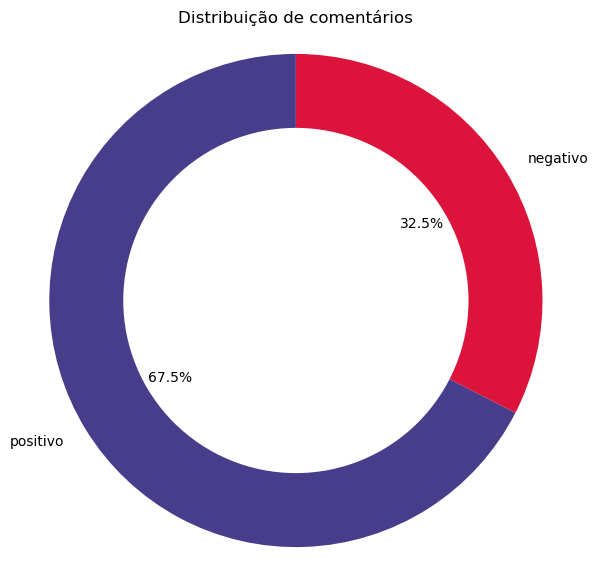

In [212]:
# Defina os rótulos e contagens
labels = df_comments.query('sentiment_label in ("positivo", "negativo")')['sentiment_label'].value_counts().index
sizes = df_comments.query('sentiment_label in ("positivo", "negativo")')['sentiment_label'].value_counts().values

# Crie o gráfico de pizza
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['darkslateblue', 'crimson'])

# Adicione um círculo branco no centro para criar o efeito de "buraco"
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Ajuste o aspecto para ser um círculo
ax.axis('equal')  

plt.title('Distribuição de comentários')
plt.savefig('Dist.png', format='png')
plt.show()

In [204]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stopwords.words('portuguese')):
    """
    Args
    ----------
    corpus: text to be analysed [type: pd.DataFrame]
    ngram_range: type of n gram to be used on analysis [type: tuple]
    n: top limit of ngrams to be shown [type: int, default: -1]
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [205]:
# Splitting the corpus into positivo and negativo comments
positivo_comments = df_comments.query('sentiment_label == "positivo"')['stemming']
negativo_comments = df_comments.query('sentiment_label == "negativo"')['stemming']

# Extracting the top 10 unigrams by sentiment
unigrams_pos = ngrams_count(positivo_comments, (1, 1), 10)
unigrams_neg = ngrams_count(negativo_comments, (1, 1), 10)

# Extracting the top 10 unigrams by sentiment
bigrams_pos = ngrams_count(positivo_comments, (2, 2), 10)
bigrams_neg = ngrams_count(negativo_comments, (2, 2), 10)

# Extracting the top 10 unigrams by sentiment
trigrams_pos = ngrams_count(positivo_comments, (3, 3), 10)
trigrams_neg = ngrams_count(negativo_comments, (3, 3), 10)

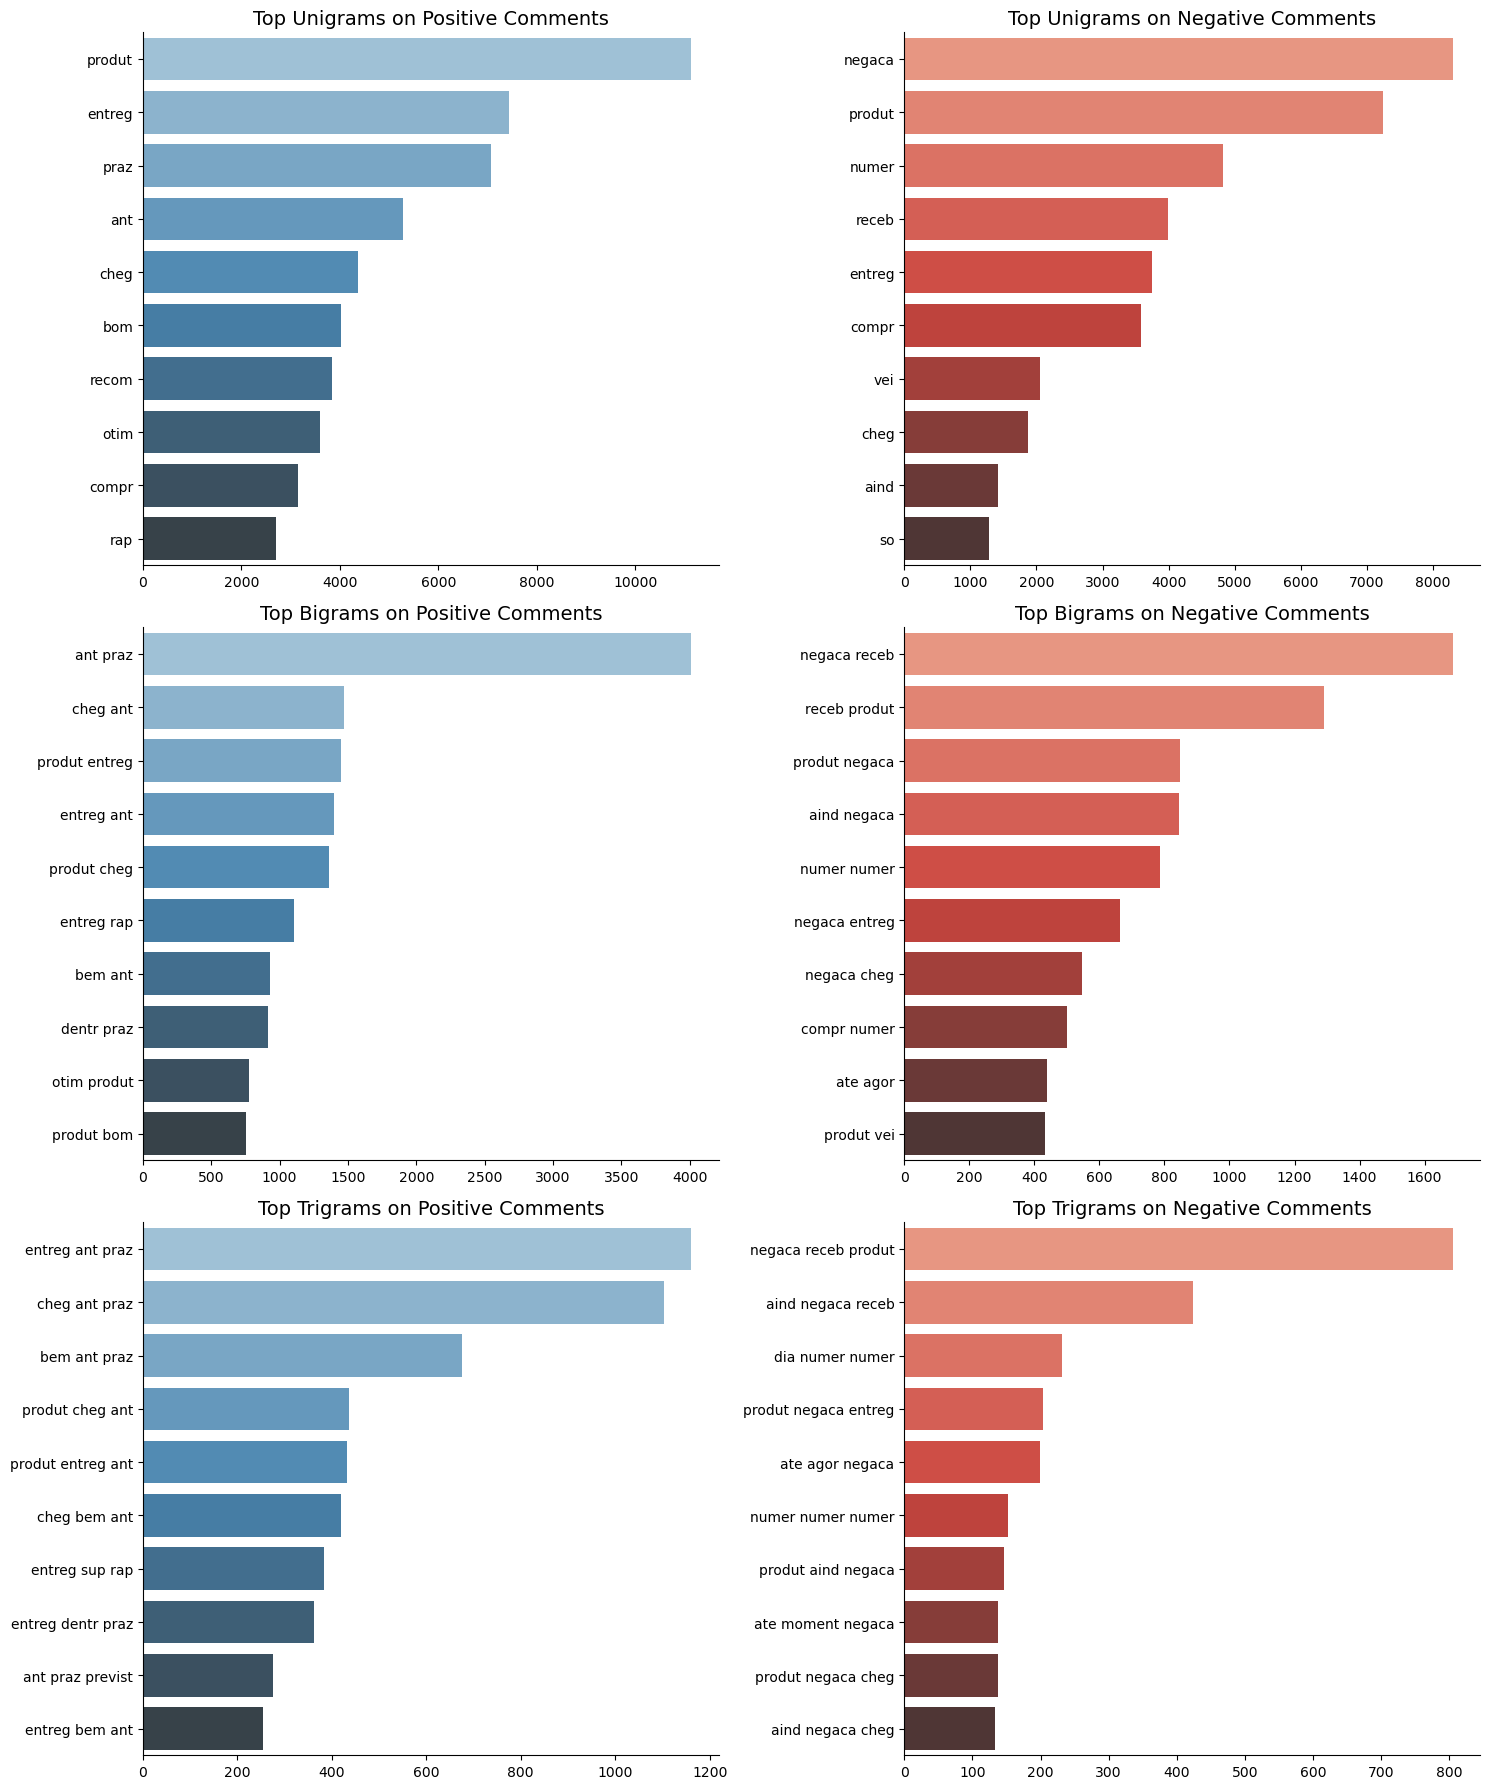

In [207]:
# Plotting the ngrams analysis
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
i, j = 0, 0
colors = ['Blues_d', 'Reds_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
    
    # Customizing plots
    ax.set_title(title, size=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Removing spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Incrementing the index
    j += 1
    if j == 2:
        j = 0
        i += 1
plt.tight_layout()
plt.savefig('Palavras_frequentes.png', format='png')
plt.show()


Os gráficos de barras acima são interessantes e realmente refletem o sentimento com base nos n-gramas. Podemos claramente ver palavras negativas nos bigramas e trigramas do lado direito da figura (o trigrama mais frequente `negaca receb produt`, mostrando que a maior razão dos comentários negativos é de que a pessoa `não recebeu o produto`, por exemplo).

Os bigramas e trigramas positivos no lado azul esquerdo da figura realmente consistem em palavras positivas (o trigrama mais frequente `entreg ant praz` significa algo como `entrega antes do prazês)o!

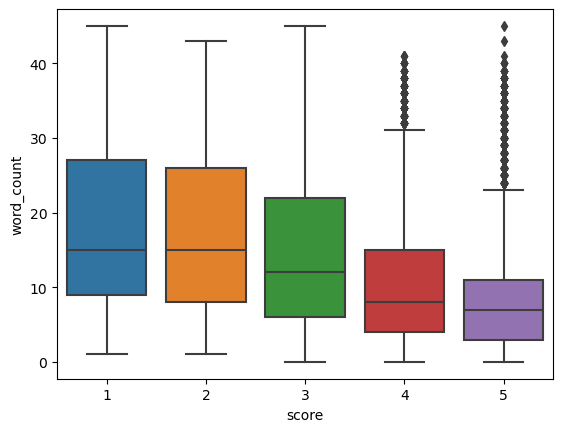

In [208]:

sns.boxplot(x='score', y='word_count', data=df_comments)
plt.show()

Com o gráfico acim é possível ver que quanto menor a avaliação, mais palavras são utilizadas.

Abaixo as palavras mais frequentes com a nota 1.

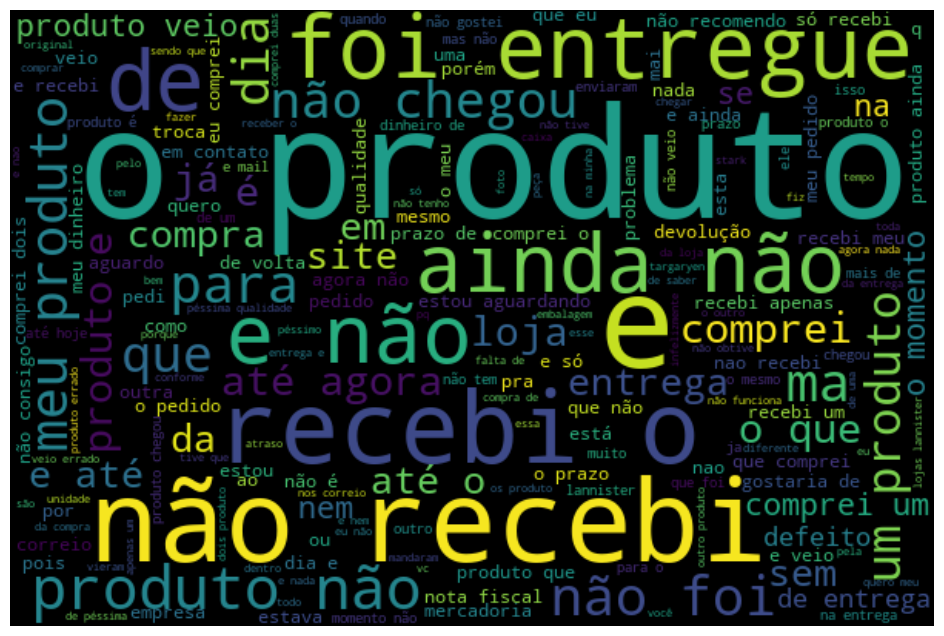

In [209]:
def visualize(label):
    words = ''
    for msg in df_comments[df_comments['score'] == label]['comment']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('Wordcloud_nota1.png', format='png')
    plt.show()
visualize(1)

## 5.6 Pipeline
Então, depois de detalhar todos os passos considerados nesta preparação de texto, vou construir um código para aplicar automaticamente um pipeline completo para lidar com ele. Este é um passo importante no projeto porque com isso podemos receber uma entrada de texto e aplicar todas as mudanças necessárias para deixá-la pronta para treinar ou prever o rótulo de sentimento.

In [129]:
# Class for regular expressions application
class ApplyRegex(BaseEstimator, TransformerMixin):
    
    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Applying all regex functions in the regex_transformers dictionary
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)
            
        return X

# Class for stopwords removal from the corpus
class StopWordsRemoval(BaseEstimator, TransformerMixin):
    
    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [' '.join(stopwords_removal(comment, self.text_stopwords)) for comment in X]

# Class for apply the stemming process
class StemmingProcess(BaseEstimator, TransformerMixin):
    
    def __init__(self, stemmer):
        self.stemmer = stemmer
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [' '.join(stemming_process(comment, self.stemmer)) for comment in X]
    
# Class for extracting features from corpus
class TextFeatureExtraction(BaseEstimator, TransformerMixin):
    
    def __init__(self, vectorizer):
        self.vectorizer = vectorizer
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return self.vectorizer.fit_transform(X).toarray()

In [130]:
# Defining regex transformers to be applied
regex_transformers = {
    'break_line': re_breakline,
    'hiperlinks': re_hiperlinks,
    'dates': re_dates,
    'money': re_money,
    'numbers': re_numbers,
    'negation': re_negation,
    'special_chars': re_special_chars,
    'whitespaces': re_whitespaces
}

# Defining the vectorizer to extract features from text
vectorizer = TfidfVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=pt_stopwords)

# Building the Pipeline
text_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords.words('portuguese'))),
    ('stemming', StemmingProcess(RSLPStemmer())),
    ('text_features', TextFeatureExtraction(vectorizer))
])

In [134]:
score_map = {
    1: 'negativo',
    2: 'negativo',
    3: 'positivo',
    4: 'positivo',
    5: 'positivo'
}

In [135]:
# Defining X and y 
idx_reviews = reviews['review_comment_message'].dropna().index
score = reviews['review_score'][idx_reviews].map(score_map)

# Splitting into train and test sets
X = list(reviews['review_comment_message'][idx_reviews].values)
y = score.apply(lambda x: 1 if x == 'positivo' else 0).values

# Applying the pipeline and splitting the data
X_processed = text_pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=.20, random_state=42)

# Verifying results
print(f'Length of X_train_processed: {len(X_train)} - Length of one element: {len(X_train[0])}')
print(f'Length of X_test_processed: {len(X_test)} - Length of one element: {len(X_test[0])}')

Length of X_train_processed: 32781 - Length of one element: 300
Length of X_test_processed: 8196 - Length of one element: 300


# 6. Classificação Sentimental

In [166]:

logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear']
}

set_classifiers = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': logreg_param_grid
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    }
}

Training LogisticRegression...
Training Naive Bayes...
           Classifier  Accuracy  F1-Score
0  LogisticRegression  0.885676  0.885938
1         Naive Bayes  0.834675  0.841878


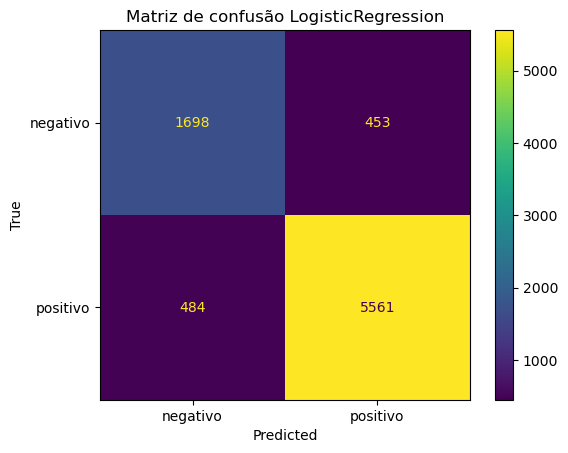

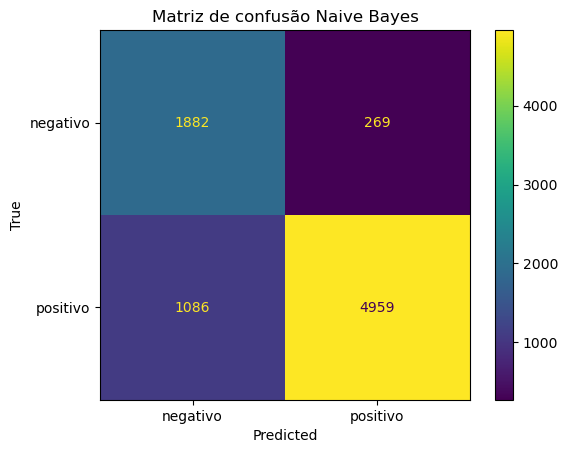

In [197]:
# Função para treinamento e avaliação
def train_and_evaluate(classifiers, X_train, y_train, X_test, y_test):
    performances = []

    for clf_name, clf_info in classifiers.items():
        print(f'Training {clf_name}...')
        if clf_name == 'Naive Bayes':
            # Convertendo para array para GaussianNB
            model = clf_info['model']
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            cmd = ConfusionMatrixDisplay(cm, display_labels=['negativo','positivo'])
            cmd.plot()
            cmd.ax_.set(xlabel='Predicted', ylabel='True')
            cmd.ax_.set_title(f'Matriz de confusão {clf_name}')
        else:
            model = GridSearchCV(
                estimator=clf_info['model'],
                param_grid=clf_info['params'],
                cv=5,
                scoring='accuracy',
                n_jobs=-1
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            cmd = ConfusionMatrixDisplay(cm, display_labels=['negativo','positivo'])
            cmd.plot()
            cmd.ax_.set(xlabel='Predicted', ylabel='True')
            cmd.ax_.set_title(f'Matriz de confusão {clf_name}')
        
        
        report = classification_report(y_test, y_pred, output_dict=True)
        performances.append({'Classifier': clf_name, 'Accuracy': report['accuracy'], 'F1-Score': report['weighted avg']['f1-score']})

        
        
    return pd.DataFrame(performances)

# Avaliando os classificadores
df_performances = train_and_evaluate(set_classifiers, X_train, y_train, X_test, y_test)
print(df_performances)


O modelo de Regressão Logística mostrou resultados melhores, comparado ao Naive Bayes

## Com base na análise realizada, as seguintes estratégias de negócios podem ser recomendadas:

* **Garantir Entregas Pontuais:** Implementar medidas para garantir que os produtos sejam entregues aos clientes dentro do prazo. Isso poderia envolver a otimização dos processos logísticos, a melhoria na comunicação com os parceiros de transporte e o estabelecimento de prazos realistas de entrega.

* **Promover Produtos de Alto Valor:** Priorizar a promoção e visibilidade de produtos mais caros no site. Considere apresentar esses produtos de forma proeminente na página inicial ou em campanhas de marketing direcionadas para aumentar as vendas e a receita.

* **Focar na Retenção de Clientes:** Desenvolver estratégias para reter clientes existentes e incentivar compras repetidas. Isso poderia envolver iniciativas de marketing personalizadas, programas de fidelidade e engajamento proativo com o cliente para melhorar a satisfação e a fidelidade do cliente.

* **Suporte Pós venda:** Implementar iniciativas proativas de atendimento ao cliente, como fazer chamadas de acompanhamento para os clientes após eles realizarem um pedido. Isso pode ajudar a resolver possíveis problemas ou preocupações, melhorar a satisfação do cliente e construir confiança com os clientes.

* **Aprimorar o Rastreamento Analítico:** Investir em ferramentas robustas de rastreamento analítico para reunir dados abrangentes sobre o comportamento, preferências e interações dos clientes no site. Esses dados podem fornecer insights valiosos para tomada de decisões e otimização em diversos aspectos do negócio de comércio eletrônico.

Ao implementar essas estratégias, o site de comércio eletrônico Olist pode melhorar a satisfação do cliente, impulsionar o crescimento das vendas e fortalecer sua posição competitiva no mercado.